## This notebook is meant to test the methods for combining ellipses found in the model/poca_data_manipulation.py file

In [1]:
from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap as cmap
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
import matplotlib as mpl
mpl.style.use('classic')

import numpy as np

from model.poca_data_manipulation import six_ellipsoid_parameters
from model.poca_data_manipulation import xy_parallel_projection
from model.poca_data_manipulation import combine_ellipsoids, plot_combined_ellipse
from model.poca_data_manipulation import ellipse_parameters_for_plotting

In [2]:
num = 30 # number of ellipsoids to generate

# generate random ellipsoid parameters
centers = np.random.randn(num,3)*10
major_axes = np.random.randn(num,3)*2
minor_axes1 = np.random.randn(num,3)*2
minor_axes2 = np.random.randn(num,3)*2

In [3]:
# combine ellipsoids
center, major_axis, minor_axis1, minor_axis2 = combine_ellipsoids(centers.T, major_axes.T, minor_axes1.T, minor_axes2.T)

center =  [ 1.58227458e+00 -5.04670461e+00  3.47575542e-03]
major axis =  [ 3.46049490e-04  3.14848934e-01 -3.87599967e-01]
minor axis 1 =  [ 0.07919214  0.02878784 -0.18438197]
minor axis 2 =  [0.43560528 0.21653897 0.42155624]


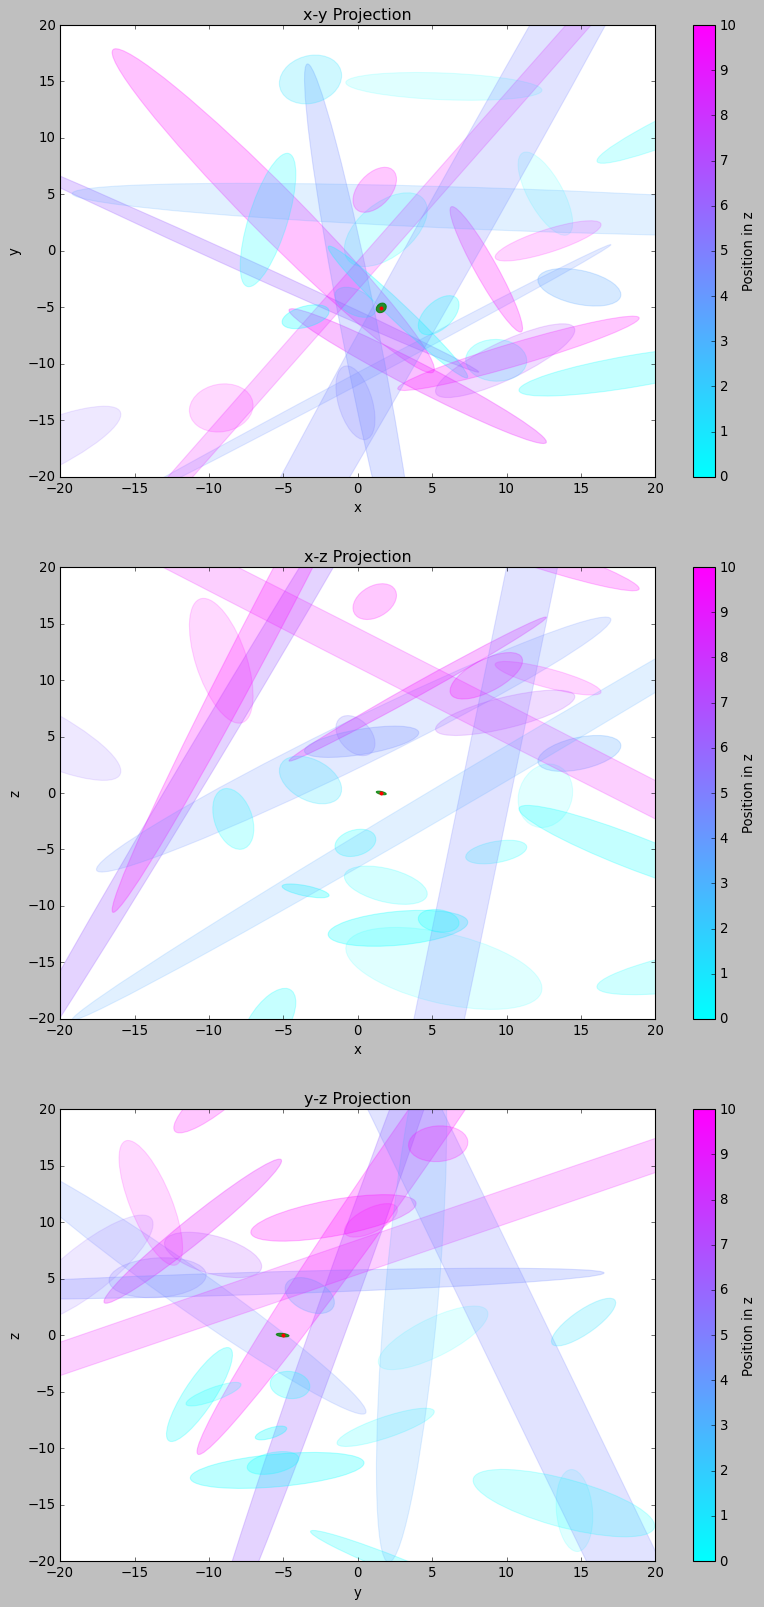

In [7]:
# plot ellipsoid projections and combined ellipsoid projections
fig, axes = plt.subplots(3, figsize=(12,24),gridspec_kw={'height_ratios':[4,4,4], 'hspace':0.2})

cm = cmap("cool")

for i in range(num):
    
    major_axis_mag = np.sqrt(major_axes[i,0]**2 + major_axes[i,1]**2 + major_axes[i,2]**2)
    
    color_scaling = (centers[i,2] - 0)/(10-0)
    color = cm(color_scaling)
    
    A,B,C,D,E,F = six_ellipsoid_parameters(major_axes[i,:], minor_axes1[i,:], minor_axes2[i,:])
    
    alpha_xy, beta_xy, gamma_xy, delta_xy = xy_parallel_projection(A, B, C, D, E ,F)
    a_xy, b_xy, theta_xy = ellipse_parameters_for_plotting(alpha_xy,beta_xy,gamma_xy,delta_xy,A,C)
    
    alpha_xz, beta_xz, gamma_xz, delta_xz = xy_parallel_projection(A, C, B, E, D, F)
    a_xz, b_xz, theta_xz = ellipse_parameters_for_plotting(alpha_xz,beta_xz,gamma_xz,delta_xz,A,B)
                
    alpha_yz, beta_yz, gamma_yz, delta_yz = xy_parallel_projection(B, C, A, F, D, E)
    a_yz, b_yz, theta_yz = ellipse_parameters_for_plotting(alpha_yz,beta_yz,gamma_yz,delta_yz,B,A)
    
    thisEllipseXY = Ellipse([centers[i,0], centers[i,1]], a_xy, b_xy, theta_xy, color=color)
    thisEllipseXZ = Ellipse([centers[i,0], centers[i,2]], a_xz, b_xz, theta_xz, color=color)
    thisEllipseYZ = Ellipse([centers[i,1], centers[i,2]], a_yz, b_yz, theta_yz, color=color)
    
    alpha = 0.1*major_axis_mag
    alpha = min(alpha,1)
    alpha = 1-alpha
    alpha = 0.3*max(alpha, 0.05)
    
    axes[0].add_artist(thisEllipseXY)
    thisEllipseXY.set_clip_box(axes[0].bbox)
    thisEllipseXY.set_alpha(alpha)
                
    axes[1].add_artist(thisEllipseXZ)
    thisEllipseXZ.set_clip_box(axes[1].bbox)
    thisEllipseXZ.set_alpha(alpha)
                
    axes[2].add_artist(thisEllipseYZ)
    thisEllipseYZ.set_clip_box(axes[2].bbox)
    thisEllipseYZ.set_alpha(alpha)
    
fig.colorbar(ScalarMappable(norm=Normalize(vmin=0, vmax=10), cmap=cm), ax=axes[0], label='Position in z')
fig.colorbar(ScalarMappable(norm=Normalize(vmin=0, vmax=10), cmap=cm), ax=axes[1], label='Position in z')
fig.colorbar(ScalarMappable(norm=Normalize(vmin=0, vmax=10), cmap=cm), ax=axes[2], label='Position in z')

A,B,C,D,E,F = six_ellipsoid_parameters(major_axis, minor_axis1, minor_axis2)

alpha_xy, beta_xy, gamma_xy, delta_xy = xy_parallel_projection(A, B, C, D, E ,F)
a_xy, b_xy, theta_xy = ellipse_parameters_for_plotting(alpha_xy,beta_xy,gamma_xy,delta_xy,A,C)
    
alpha_xz, beta_xz, gamma_xz, delta_xz = xy_parallel_projection(A, C, B, E, D, F)
a_xz, b_xz, theta_xz = ellipse_parameters_for_plotting(alpha_xz,beta_xz,gamma_xz,delta_xz,A,B)
                
alpha_yz, beta_yz, gamma_yz, delta_yz = xy_parallel_projection(B, C, A, F, D, E)
a_yz, b_yz, theta_yz = ellipse_parameters_for_plotting(alpha_yz,beta_yz,gamma_yz,delta_yz,B,A)

thisEllipseXY = Ellipse([center[0], center[1]], a_xy, b_xy, theta_xy, color='g')
thisEllipseXZ = Ellipse([center[0], center[2]], a_xz, b_xz, theta_xz, color='g')
thisEllipseYZ = Ellipse([center[1], center[2]], a_yz, b_yz, theta_yz, color='g')

axes[0].add_artist(thisEllipseXY)
thisEllipseXY.set_clip_box(axes[0].bbox)
thisEllipseXY.set_alpha(0.8)
axes[0].plot(center[0], center[1], marker = '.', linestyle = '', color = 'r')
                
axes[1].add_artist(thisEllipseXZ)
thisEllipseXZ.set_clip_box(axes[1].bbox)
thisEllipseXZ.set_alpha(0.8)
axes[1].plot(center[0], center[2], marker = '.', linestyle = '', color = 'r')
                
axes[2].add_artist(thisEllipseYZ)
thisEllipseYZ.set_clip_box(axes[2].bbox)
thisEllipseYZ.set_alpha(0.8)
axes[2].plot(center[1], center[2], marker = '.', linestyle = '', color = 'r')

print('center = ', center)
print('major axis = ', major_axis)
print('minor axis 1 = ', minor_axis1)
print('minor axis 2 = ', minor_axis2)

axes[0].set_xlim([-20,20])
axes[0].set_ylim([-20,20])
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title('x-y Projection')
axes[1].set_xlim([-20,20])
axes[1].set_ylim([-20,20])
axes[1].set_xlabel('x')
axes[1].set_ylabel('z')
axes[1].set_title('x-z Projection')
axes[2].set_xlim([-20,20])
axes[2].set_ylim([-20,20])
axes[2].set_xlabel('y')
axes[2].set_ylabel('z')
axes[2].set_title('y-z Projection')


plt.show()
    
    